# **Exercice 1 : Reconnaissance de chiffres manuscrits (MNIST)**

In [1]:
import sys
print(sys.executable)

C:\Users\pc\anaconda3\envs\tf\python.exe


## **I. Import des bibliothèques**

In [62]:
#!pip install kagglehub
#!pip install ipywidgets

In [64]:
#!pip install "numpy<2" --force-reinstall
#!pip install matplotlib

In [49]:
import kagglehub

# connexion
#kagglehub.login()

# Download latest version
#path = kagglehub.dataset_download("hojjatk/mnist-dataset")

#print("Path to dataset files:", path)

**1. Quelle est la différence entre TensorFlow et Keras ?**

- TensorFlow est un framework complet de deep learning développé par Google. Il fournit des outils pour Construire des modèles de réseaux de neurones (à bas ou haut niveau), il gérer le calcul différentiel automatique, sauvegarder, exporter et déployer les modèles. C’est une infrastructure bas niveau et très puissante, mais parfois complexe à manipuler directement.

- Keras est une API de haut niveau (une interface) qui permet de construire et entraîner des modèles de deep learning de manière simple et intuitive. Keras est directement intégré dans TensorFlow (sous le module tensorflow.keras).

**2. À quoi sert la couche Flatten dans un réseau de neurones ?**

Une **couche Dense** est une couche de neurones entièrement connectée : chaque neurone reçoit toutes les entrées de la couche précédente, leur applique un poids, ajoute un biais, puis passe le tout à une fonction d’activation. Elle permet d’apprendre des combinaisons complexes des caractéristiques extraites par les couches précédentes.

Cependant, les couches Denses attendent en entrée un vecteur 1D, alors que les images et les couches convolutionnelles/pooling produisent des tensors 2D ou 3D (par exemple une image 28×28×32).

On a donc besoin d’une étape de transition : la **couche Flatten**, qui transforme simplement un tenseur multidimensionnel en un vecteur 1D sans en changer les valeurs.

**3. Quelle version de TensorFlow est installée sur votre machine ?**

In [1]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.0


**4. À quoi servent Sequential et Dense ?**

Un **Sequential** c’est une façon simple de construire un modèle couche par couche de manière linéaire (chaque couche a une seule entrée et une seule sortie).

Une **couche Dense** est une couche de neurones entièrement connectée , chaque neurone de la couche est connecté à tous les neurones de la couche précédente. 

Elle calcule : y=f(Wx+b)

où :
- W : matrice des poids,
- b : biais,
- f : fonction d’activation (relu, sigmoid, softmax, etc.).



## **II. Chargement et préparation du dataset**

In [4]:
#préparation de dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation pour accélérer la convergence
x_train = x_train / 255.0
x_test = x_test / 255.0
    
print("x_train shape:", x_train. shape)
print("y_train shape:", y_train. shape)

x_train shape: (60000, 28, 28)
y_train shape: (60000,)


**1. Pourquoi normalise-t-on les valeurs des pixels ?**
- Accélère la convergence de l’optimisation

Les réseaux de neurones utilisent des méthodes comme gradient descent. Si les valeurs d’entrée sont très grandes (ici, 0–255), les gradients peuvent devenir très grands ou très petits, ce qui : ralentit l’entraînement,peut causer des oscillations ou une divergence du réseau.

- Évite les problèmes de saturation des activations

Par exemple, pour des fonctions comme sigmoid ou tanh : Des entrées grandes saturent la fonction → gradient proche de 0 → apprentissage très lent.
Même pour ReLU, normaliser aide à avoir des activations équilibrées.

- Homogénéise les features

Chaque pixel devient comparable à un autre, évitant que certaines valeurs dominent l’apprentissage.
  
**2. Quelle est la taille d’une image et son type de données ?**

In [8]:
print("la taille d'une image", x_train[0].shape)    # Après normalisation : uint8 (entier 0–255) → float32 (valeurs entre 0 et 1)
print("type de données", x_train[0].dtype)       # Taille d’une image : 28 x 28 pixels

la taille d'une image (28, 28)
type de données float64


**3. Combien d’exemples contient le jeu d’entraînement ?**

In [11]:
print("Nombre d’exemples d'entraînement :", x_train.shape[0])
print("Nombre d’exemples de test :", x_test.shape[0])


Nombre d’exemples d'entraînement : 60000
Nombre d’exemples de test : 10000


##  **III. Visualisation d’échantillons**

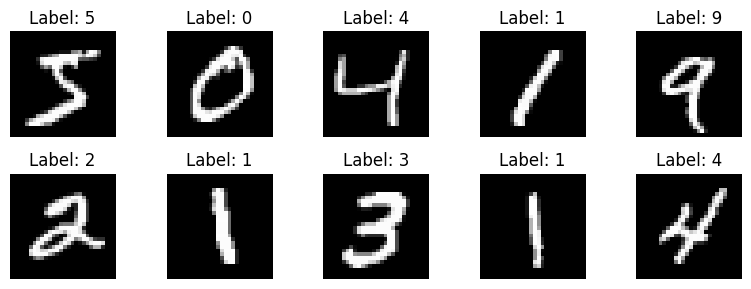

In [14]:
# vérifier que les données sont correctes.

plt.figure(figsize=(8,3))
for i in range(10):       # afficher les 10 premières images du jeu d'entraînement.
    plt.subplot(2,5,i+1)  # crée un sous-graphique subplot (n_rows, n_cols, index) dans la figure.
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')       # supprime les axes pour une meilleure lisibilité.
plt.tight_layout()

Voyons que les labels correspondent bien aux images

**1. Quelle commande permet de modifier le nombre d’images affichées ?**

Le nombre d’images affichées peut être modifié en ajustant la fonction range. Dans notre exemple, range(10) permet d’afficher les 10 premières images.

**2. Que représente l’argument cmap='gray' ?**

L’argument cmap spécifie la palette de couleurs utilisée pour visualiser l’image. Dans notre code, la valeur 'gray' permet d’afficher les images en niveaux de gris. 

**3. Quelle utilité a cette étape dans un projet d’IA ?**

Cette étape permet de :
- vérifier que le dataset et les labels utilisés pour l’entraînement sont corrects, afin d’éviter que le modèle n’apprenne des informations incorrectes.
- Comprendre la nature des données, ce qui aide à choisir la bonne architecture ou prétraitement pour le modèle.
  
## **IV. Construction du modèle de réseau de neurones**

In [17]:

model = Sequential([                 # crée un modèle linéaire, couche par couche, où la sortie d’une couche est l’entrée de la suivante.
    Input(shape=(28, 28)),           # l'entrée est une image 28×28
    Flatten(),                       # transforme la matrice 28×28 en un vecteur de 784 éléments (28*28)
    Dense(128, activation='relu'),   # 128 neurones
    Dense(10, activation='softmax')  # 10 neuronnes = 10 classes à prédire
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**1. Combien de paramètres le modèle contient-il ?**

Après le Flatten(), notre image de 28×28 pixels devient un vecteur de 784 valeurs (un pixel par valeur). Chaque neurone de la première couche Dense (128 neurones) reçoit toutes les 784 entrées.

1 neurone de la couche cachée → somme pondérée des 784 pixels + biais → activation ReLU

Donc Total = 100 480 = poids + biais avec  (Poids : 784 × 128 = 100 352 - Biais : 128 )

(128 neurones → chacun fait ce calcul → c’est pour ça qu’on a 784 × 128 poids)
    
**2. Quelle est la fonction d’activation utilisée dans la couche de sortie ? Pourquoi ?**

La couche de sortie utilise Softmax, car on fait de la classification multi-classes (MNIST : 10 chiffres).

Softmax convertit les valeurs de sortie en probabilités qui s’additionnent à 1. Cela permet de choisir la classe avec la probabilité maximale

**3. Quelle est la différence entre ReLU et Softmax ?**

- ReLU : Introduit de la non-linéarité, sinon le modèle ne pourrait apprendre que des combinaisons linéaires.
- softmax : Transforme les scores en probabilités pour classification multi-classes.

## **V. Compilation du modèle**

La ompilation du modèle c’est la préparation du modèle avant l’entraînement .On définit comment le modèle va apprendre :
- Optimiseur (optimizer) : comment ajuster les poids.
- Fonction de perte (loss) : ce qu’on veut minimiser.
- Metrics (metrics) : indicateurs pour suivre la performance.

À ce stade, aucune modification des poids n’a lieu, le modèle est juste configuré.

In [21]:

model.compile(
optimizer='adam',                             # L’optimiseur (adam) : ajuste les poids pendant l’apprentissage
loss='sparse_categorical_crossentropy',       # Loss function : calcule l’erreur entre la sortie et la vérité
metrics=['accuracy']                          # La métrique (accuracy) : évalue la précision du modèle
)

**1. Qu’est-ce qu’un optimiseur ?**
    
Un optimiseur est un algorithme qui ajuste les poids du réseau de neurones pendant l’entraînement afin de minimiser la fonction de perte. Il décide comment et dans quelle direction modifier les poids à chaque itération.

**2. Pourquoi utilise-t-on une fonction de perte ?**

La fonction de perte (loss function) mesure l’écart entre les prédictions du modèle et les valeurs réelles. Elle sert de guide pour l’optimiseur : plus la perte est élevée, plus le modèle se trompe, et l’optimiseur va corriger les poids en conséquence.


**3. Que se passe-t-il si on change la fonction de perte ?**

Changer la fonction de perte modifie ce que le modèle essaie d’optimiser. Par exemple, categorical_crossentropy est adaptée pour classification multi-classes, tandis que mean_squared_error est utilisée pour régression.

Un mauvais choix peut rendre l’entraînement inefficace, ou faire apprendre au modèle des choses inutiles.

**5. Quelle serait la conséquence d’un mauvais choix d’optimiseur ?**

Un optimiseur mal choisi peut :
- ralentir l’entraînement ou empêcher la convergence.
- provoquer des oscillations des poids (le modèle ne “stabilise” jamais sa perte).
- mener à un minimum local non optimal (performance faible).


**6. Quelle est la différence entre loss et metrics ?**

- loss : ce que le modèle essaie de minimiser pendant l’entraînement (utilisé par l’optimiseur).
- metrics : indicateurs pour évaluer la performance du modèle, mais non utilisés pour ajuster les poids.

## **VI. Entraînement du modèle**
C’est le processus où le modèle apprend réellement à partir des données.

On fournit les entrées (x_train) et sorties (y_train) et on fait passer les données dans le réseau pour calculer la perte et mettre à jour les poids via l’optimiseur.

In [25]:
history = model.fit(
    x_train, y_train,
    epochs=5,          # le modèle va voir toutes les images 5 fois
    batch_size=32,
    validation_split = 0.2 # 20% of x_train will be used as validation
)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2898 - accuracy: 0.9187 - val_loss: 0.1643 - val_accuracy: 0.9529
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9618 - val_loss: 0.1141 - val_accuracy: 0.9678
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0864 - accuracy: 0.9746 - val_loss: 0.1067 - val_accuracy: 0.9692
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0662 - accuracy: 0.9800 - val_loss: 0.0982 - val_accuracy: 0.9712
Epoch 5/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0492 - accuracy: 0.9849 - val_loss: 0.0992 - val_accuracy: 0.9733


**• La précision d’entraînement augmente-t-elle ?**

Oui, la précision d’entraînement augmente régulièrement, ce qui montre que le modèle apprend bien sur les données d’entraînement.

**• La précision de validation suit-elle la même tendance ?**

La précision de validation augmente aussi, puis se stabilise à la fin, ce qui est très bon..

### Questions :
**1. Que représente une “époque” ?**

Un époque c'un passage complet sur tout le jeu de données d’entraînement.

Autrement dit, pendant une époque, le réseau de neurones voit toutes les images (ou échantillons) une fois, calcule la perte (loss) et met à jour ses poids pour réduire cette erreur. L’entraînement d’un modèle s’effectue généralement sur plusieurs époques afin d’améliorer progressivement la précision et la convergence du modèle.

**2. Pourquoi utilise-t-on un jeu de validation ?**

C’est un sous-ensemble distinct des données d’entraînement, utilisé pour évaluer le modèle après chaque époque. Le modèle ne s’entraîne pas sur ces données, il les “voit” seulement pour vérifier :
- s’il généralise bien,
- s’il commence à surapprendre (overfitting).

**3. Que se passerait-il si on augmentait le nombre d’époques à 50 ?**

Si on augmente le nombre d’époques à 50, deux situations peuvent se produire :

- Phase positive (sous-apprentissage corrigé) :
Si le modèle n’avait pas encore convergé, un plus grand nombre d’époques lui permettrait d’améliorer sa précision en continuant à apprendre les bons motifs.

- Phase négative (surapprentissage) :
Après un certain point, le modèle commence à mémoriser les données d’entraînement au lieu d’apprendre à généraliser.
(Si la perte d’entraînement continue de baisser mais la perte de validation augmente)

Dans notre cas, la précision (accuracy) d’entraînement augmente progressivement au fil des époques, ce qui montre que le modèle continue à apprendre et à améliorer ses performances. Cependant, à partir de la 5ième époque, la précision de validation se stabilise après une croissance régulière. Cela peut indiquer qu’une augmentation supplémentaire du nombre d’époques risquerait d’entraîner un début de surapprentissage (overfitting).


## **VII. Évaluation du modèle**


In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc :.4f}")
print(f"Test loss: {test_loss :.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9714
Test accuracy: 0.9714
Test loss: 0.0909


**1. Quelle est la précision finale de votre modèle ?**

- accuracy: 0.9714 → Le modèle a bien prédit 97,64 % des étiquettes du jeu de test.

- loss: 0.0909 → La perte moyenne sur tout le jeu de test est 0,0793.

**2. Pourquoi la précision du test est souvent inférieure à celle d’entraînement ?**

Lors de l’entraînement, le modèle apprend à partir du même ensemble de données, ce qui lui permet d’améliorer progressivement ses performances sur ces exemples connus. En revanche, le jeu de test contient des données jamais vues auparavant, ce qui permet d’évaluer la capacité réelle du modèle à généraliser ses apprentissages à de nouvelles situations.

**3. Que faire si le modèle surapprend (overfitting) ?**

Si le modèle surapprend, on peut :

- Ajouter de la régularisation (par exemple L2 ou Dropout) ;
- Collecter plus de données d’entraînement ;
- Utiliser l’augmentation de données (rotation, zoom, bruit, etc.) ;
- Réduire la complexité du modèle (moins de couches ou de neurones) ;
- Arrêter l’entraînement plus tôt (early stopping) dès que la précision de validation commence à baisser.

## **VII. Visualisation des performances**


In [30]:
print(history.history)

{'loss': [0.2897510826587677, 0.1277497112751007, 0.08641207218170166, 0.06615252792835236, 0.04924401268362999], 'accuracy': [0.918666660785675, 0.9617708325386047, 0.9746458530426025, 0.9800000190734863, 0.9849166870117188], 'val_loss': [0.16427527368068695, 0.11412549018859863, 0.10665548592805862, 0.0982133150100708, 0.09916477650403976], 'val_accuracy': [0.95291668176651, 0.9677500128746033, 0.9691666960716248, 0.9712499976158142, 0.9733333587646484]}


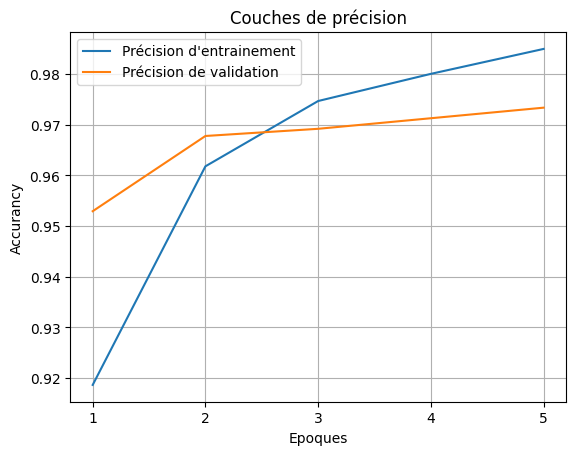

In [31]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label="Précision d'entrainement")
plt.plot(epochs, history.history['val_accuracy'], label="Précision de validation")
plt.title('Couches de précision')
plt.xlabel('Epoques')
plt.ylabel('Accurancy')
plt.xticks(epochs)
plt.legend()
plt.grid()

**1. Que remarquez-vous sur les deux courbes ?**

On observe que :
- La précision d’entraînement augmente régulièrement à chaque époque, ce qui est normal, car l’objectif de l’entraînement est d’optimiser la capacité du modèle à suivre les tendances des données.
- La courbe de précision de validation suit une progression similaire mais se stabilise à partir de la 4ᵉ époque et n’augmente plus significativement.
- À partir de la 3ᵉ époque, on remarque que la courbe de précision d’entraînement se situe au‑dessus de celle de validation, et l’écart entre les deux courbes commence à se creuser.

**2. Comment détecter visuellement un surapprentissage ?**

On parle de surapprentissage lorsque la courbe d’entraînement continue de monter, mais la courbe de validation stagne ou diminue.
Autrement dit : le modèle mémorise trop les données d’entraînement et ne généralise plus bien sur les nouvelles données.


**3. Quelle stratégie pourrait-on utiliser pour y remédier ?**

Je propose d'augmenter le nombre d'époque pour améliorer l'apprentissage

**4. Que faire si les deux courbes divergent ?**
- Early Stopping: interrompre l’entraînement dès que la précision de validation cesse de s’améliorer.
- Plus de données : augmenter la taille du jeu d’entraînement pour que le modèle généralise mieux.
- Augmentation de données : transformer les images (rotation, zoom, décalage) pour rendre le modèle plus robuste.
- Réduire la complexité du modèle : diminuer le nombre de couches ou de neurones pour éviter que le modèle mémorise le bruit des données.r.

## **IX. Prédictions et visualisation**

313/313 [==============================] - 1s 1ms/step


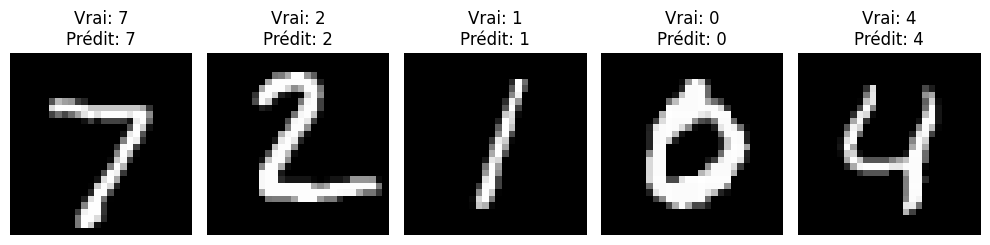

In [33]:
predictions = model.predict(x_test)    # liste des probabilte de chaque classe

plt.figure(figsize=(10,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Vrai: {y_test[i]}\nPrédit: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()

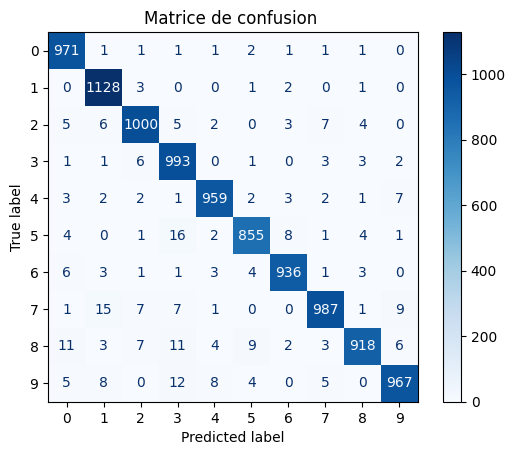

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred  = np.argmax(predictions, axis=1)
ConfusionMatrixDisplay. from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matrice de confusion ")
plt.show()

**1. Le modèle fait-il des erreurs ? Sur quelles images ?**

In [36]:
correct_prediction = 0
false_prediction = 0
false_predictions = []
for i in range(len(y_test)):
    if y_test[i] == np.argmax(predictions[i]):
        correct_prediction += 1
    else:
        false_prediction += 1
        false_predictions.append(i)

print("Prédictions correctes :", correct_prediction)
print("Prédictions incorrectes :", false_prediction)

Prédictions correctes : 9714
Prédictions incorrectes : 286


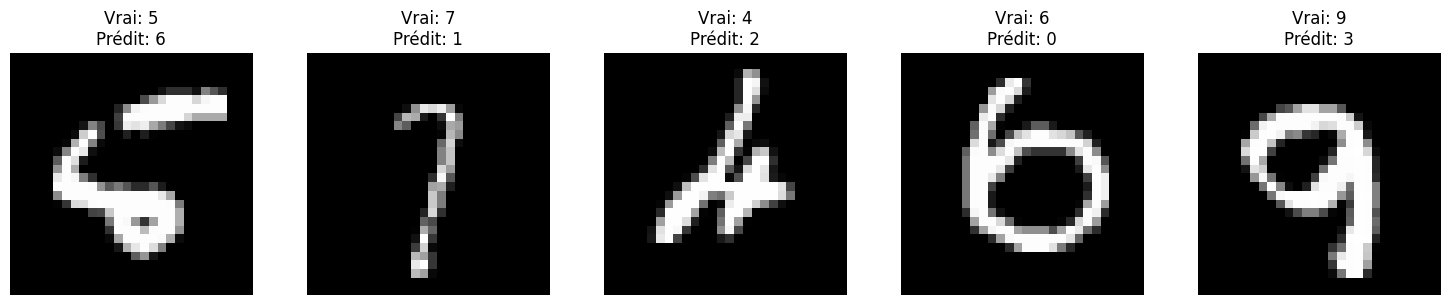

In [37]:
# affichage de quelques predictions incorrectes :
plt.figure(figsize=(15,3))
for indx,i in enumerate(false_predictions[0:5]):
    plt.subplot(1,5,indx+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Vrai: {y_test[i]}\nPrédit: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()

**2. Comment expliquer une prédiction erronée ?**

Une prédiction erronée peut survenir si le modèle est trop simple pour le problème et n’a pas suffisamment appris certaines variations des chiffres, ou si l’image contient du bruit, une rotation ou une forme inhabituelle. Cela peut également être lié à un sur-apprentissage (overfitting), où le modèle a trop mémorisé les données d’entraînement sans réussir à généraliser correctement.

**3. Quelle technique permettrait d’améliorer la précision (ex : CNN) ?**

Pour améliorer la précision, il est recommandé d’utiliser un réseau de neurones convolutif (CNN). Les CNN sont capables de détecter automatiquement des motifs locaux (traits horizontaux, verticaux, boucles) et des caractéristiques invariantes, ce qui les rend beaucoup plus performants pour la classification d’images que les réseaux entièrement connectés classiques.

# **X. Améliorations**

Dans le code ci-dessous, nous améliorons les performances du modèle ANN grâce à deux techniques :
- Early Stopping : l’entraînement est interrompu dès que la précision de validation cesse de s’améliorer, évitant ainsi le surapprentissage.
- Data Augmentation : le jeu de données d’entraînement est enrichi par des versions légèrement modifiées des images (rotation, décalage, zoom, etc.), ce qui permet au modèle de mieux généraliser.pour rendre le modèle plus robuste.

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1500/1500 [==============================] - 29s 19ms/step - loss: 0.7232 - accuracy: 0.7774 - val_loss: 0.2229

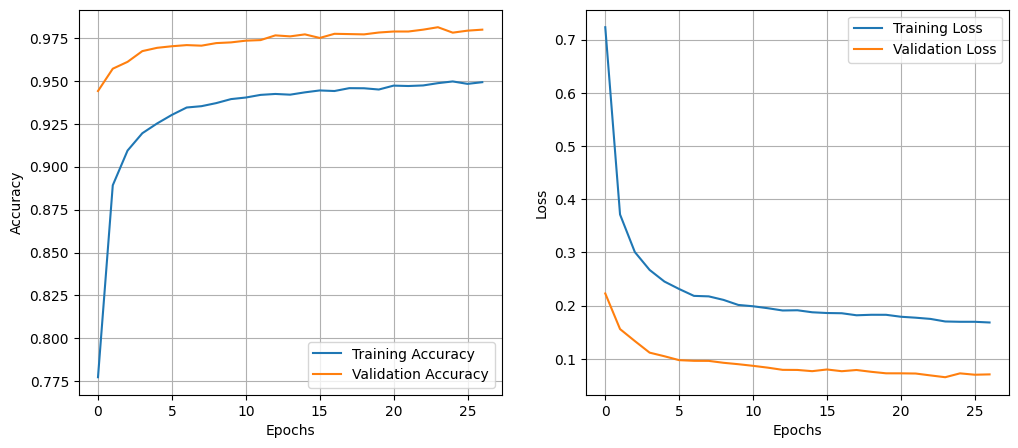

In [49]:
# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# --- 1. Chargement et préparation des données ---
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Ajouter la dimension "canal" pour le DataGenerator
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# --- 2. Split Training / Validation ---
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# --- 3. Data Augmentation ---
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
train_generator = datagen.flow(x_train_split, y_train_split, batch_size=32)

# --- 4. Création du modèle ---
model = Sequential([
    Input(shape=(28, 28, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# --- 5. Early Stopping ---
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# --- 6. Entraînement ---
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=(x_val, y_val),
    callbacks=[early_stop]
)

# --- 7. Évaluation ---
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

# --- 8. Affichage des courbes d'accuracy et loss ---
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()


In [55]:
correct_prediction = 0
false_prediction = 0
false_predictions = []
for i in range(len(y_test)):
    if y_test[i] == np.argmax(predictions[i]):
        correct_prediction += 1
    else:
        false_prediction += 1
        false_predictions.append(i)

print("Prédictions correctes :", correct_prediction)
print("Prédictions incorrectes :", false_prediction)

Prédictions correctes : 9821
Prédictions incorrectes : 179


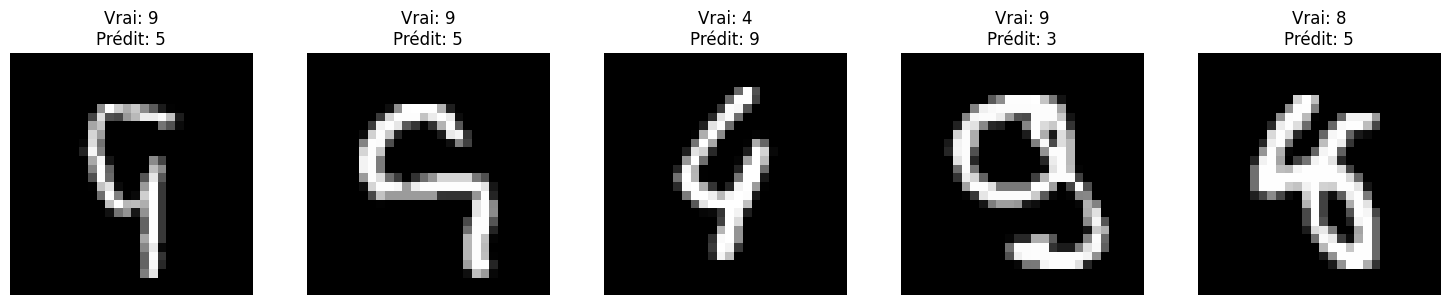

In [57]:
# affichage de quelques predictions incorrectes :
plt.figure(figsize=(15,3))
for indx,i in enumerate(false_predictions[0:5]):
    plt.subplot(1,5,indx+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Vrai: {y_test[i]}\nPrédit: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()